<a href="https://colab.research.google.com/github/colalai/CGU_deep_learning/blob/main/HW05_fundamentals_of_ml_i.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 0s 0us/step


**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 15s 36ms/step - loss: 0.6092 - accuracy: 0.8143 - val_loss: 0.2936 - val_accuracy: 0.9114
Epoch 2/10
375/375 [==============================] - 7s 20ms/step - loss: 0.2438 - accuracy: 0.9250 - val_loss: 0.2033 - val_accuracy: 0.9392
Epoch 3/10
375/375 [==============================] - 7s 20ms/step - loss: 0.1605 - accuracy: 0.9500 - val_loss: 0.1447 - val_accuracy: 0.9582
Epoch 4/10
375/375 [==============================] - 7s 19ms/step - loss: 0.1147 - accuracy: 0.9633 - val_loss: 0.1286 - val_accuracy: 0.9625
Epoch 5/10
375/375 [==============================] - 7s 20ms/step - loss: 0.0852 - accuracy: 0.9731 - val_loss: 0.1341 - val_accuracy: 0.9594
Epoch 6/10
375/375 [==============================] - 7s 19ms/step - loss: 0.0627 - accuracy: 0.9805 - val_loss: 0.1297 - val_accuracy: 0.9641
Epoch 7/10
375/375 [==============================] - 7s 20ms/step - loss: 0.0478 - accuracy: 0.9841 - val_loss: 0.1689 - val_accuracy: 0.951

**Plotting a validation accuracy comparison**

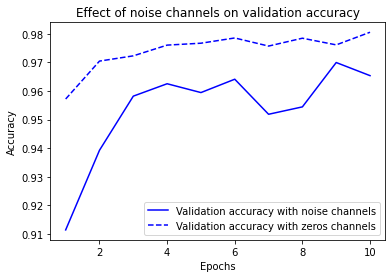

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 5s 12ms/step - loss: 2.3163 - accuracy: 0.1021 - val_loss: 2.3064 - val_accuracy: 0.1001
Epoch 2/2
375/375 [==============================] - 4s 12ms/step - loss: 2.3001 - accuracy: 0.1159 - val_loss: 2.3132 - val_accuracy: 0.1061


#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 12ms/step - loss: 944.5941 - accuracy: 0.3430 - val_loss: 3.0680 - val_accuracy: 0.2685
Epoch 2/10
375/375 [==============================] - 4s 12ms/step - loss: 3.4339 - accuracy: 0.2354 - val_loss: 6.3518 - val_accuracy: 0.2397
Epoch 3/10
375/375 [==============================] - 4s 12ms/step - loss: 3.3685 - accuracy: 0.2234 - val_loss: 2.7678 - val_accuracy: 0.2146
Epoch 4/10
375/375 [==============================] - 4s 12ms/step - loss: 2.9965 - accuracy: 0.1977 - val_loss: 2.4207 - val_accuracy: 0.1428
Epoch 5/10
375/375 [==============================] - 4s 12ms/step - loss: 2.8778 - accuracy: 0.1899 - val_loss: 2.2011 - val_accuracy: 0.1939
Epoch 6/10
375/375 [==============================] - 4s 12ms/step - loss: 2.8149 - accuracy: 0.1949 - val_loss: 2.4142 - val_accuracy: 0.2782
Epoch 7/10
375/375 [==============================] - 4s 12ms/step - loss: 2.7728 - accuracy: 0.2065 - val_loss: 2.7758 - val_accuracy: 0.27

**The same model with a more appropriate learning rate**

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 13ms/step - loss: 0.3688 - accuracy: 0.9120 - val_loss: 0.2946 - val_accuracy: 0.9265
Epoch 2/10
375/375 [==============================] - 5s 12ms/step - loss: 0.1410 - accuracy: 0.9637 - val_loss: 0.1601 - val_accuracy: 0.9638
Epoch 3/10
375/375 [==============================] - 4s 12ms/step - loss: 0.1176 - accuracy: 0.9734 - val_loss: 0.2163 - val_accuracy: 0.9610
Epoch 4/10
375/375 [==============================] - 5s 12ms/step - loss: 0.1012 - accuracy: 0.9773 - val_loss: 0.1915 - val_accuracy: 0.9665
Epoch 5/10
375/375 [==============================] - 5s 12ms/step - loss: 0.0837 - accuracy: 0.9818 - val_loss: 0.1866 - val_accuracy: 0.9726
Epoch 6/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0831 - accuracy: 0.9847 - val_loss: 0.2434 - val_accuracy: 0.9719
Epoch 7/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0743 - accuracy: 0.9864 - val_loss: 0.2719 - val_accuracy: 0.9707

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.6678 - accuracy: 0.8398 - val_loss: 0.3557 - val_accuracy: 0.9065
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3500 - accuracy: 0.9038 - val_loss: 0.3057 - val_accuracy: 0.9177
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3143 - accuracy: 0.9124 - val_loss: 0.2911 - val_accuracy: 0.9183
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2990 - accuracy: 0.9169 - val_loss: 0.2819 - val_accuracy: 0.9228
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2889 - accuracy: 0.9193 - val_loss: 0.2773 - val_accuracy: 0.9239
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2825 - accuracy: 0.9210 - val_loss: 0.2717 - val_accuracy: 0.9257
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2778 - accuracy: 0.9221 - val_loss: 0.2697 - val_accuracy: 0.9242
Epoch 

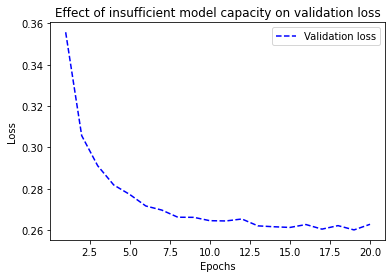

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 0.3634 - accuracy: 0.8977 - val_loss: 0.2101 - val_accuracy: 0.9381
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1603 - accuracy: 0.9526 - val_loss: 0.1379 - val_accuracy: 0.9587
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1140 - accuracy: 0.9656 - val_loss: 0.1147 - val_accuracy: 0.9657
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0875 - accuracy: 0.9739 - val_loss: 0.1061 - val_accuracy: 0.9661
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0697 - accuracy: 0.9785 - val_loss: 0.0989 - val_accuracy: 0.9722
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0578 - accuracy: 0.9827 - val_loss: 0.0986 - val_accuracy: 0.9716
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0473 - accuracy: 0.9856 - val_loss: 0.0962 - val_accuracy: 0.9739
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [10]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.5066 - accuracy: 0.7856 - val_loss: 0.3770 - val_accuracy: 0.8739
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2957 - accuracy: 0.9027 - val_loss: 0.2972 - val_accuracy: 0.8916
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2158 - accuracy: 0.9307 - val_loss: 0.2778 - val_accuracy: 0.8916
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1709 - accuracy: 0.9455 - val_loss: 0.2835 - val_accuracy: 0.8874
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1393 - accuracy: 0.9561 - val_loss: 0.2838 - val_accuracy: 0.8884
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1162 - accuracy: 0.9643 - val_loss: 0.2985 - val_accuracy: 0.8852
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0958 - accurac

**Version of the model with lower capacity**

In [11]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=10, batch_size=512, validation_split=0.4)

Epoch 1/10
30/30 [==============================] - 2s 43ms/step - loss: 0.6197 - accuracy: 0.6451 - val_loss: 0.5657 - val_accuracy: 0.7537
Epoch 2/10
30/30 [==============================] - 1s 32ms/step - loss: 0.5237 - accuracy: 0.7750 - val_loss: 0.5202 - val_accuracy: 0.7950
Epoch 3/10
30/30 [==============================] - 1s 31ms/step - loss: 0.4756 - accuracy: 0.8493 - val_loss: 0.4961 - val_accuracy: 0.8259
Epoch 4/10
30/30 [==============================] - 1s 31ms/step - loss: 0.4407 - accuracy: 0.8858 - val_loss: 0.4779 - val_accuracy: 0.8661
Epoch 5/10
30/30 [==============================] - 1s 31ms/step - loss: 0.4147 - accuracy: 0.9129 - val_loss: 0.4674 - val_accuracy: 0.8737
Epoch 6/10
30/30 [==============================] - 1s 30ms/step - loss: 0.3928 - accuracy: 0.9288 - val_loss: 0.4667 - val_accuracy: 0.8638
Epoch 7/10
30/30 [==============================] - 1s 30ms/step - loss: 0.3737 - accuracy: 0.9419 - val_loss: 0.4574 - val_accuracy: 0.8762
Epoch 8/10
30

**Version of the model with higher capacity**

In [12]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 10s 302ms/step - loss: 0.5580 - accuracy: 0.7455 - val_loss: 0.3186 - val_accuracy: 0.8855
Epoch 2/20
30/30 [==============================] - 9s 292ms/step - loss: 0.2498 - accuracy: 0.9039 - val_loss: 0.2896 - val_accuracy: 0.8834
Epoch 3/20
30/30 [==============================] - 9s 295ms/step - loss: 0.1469 - accuracy: 0.9491 - val_loss: 0.3058 - val_accuracy: 0.8906
Epoch 4/20
30/30 [==============================] - 9s 293ms/step - loss: 0.0671 - accuracy: 0.9755 - val_loss: 0.4166 - val_accuracy: 0.8810
Epoch 5/20
30/30 [==============================] - 9s 291ms/step - loss: 0.1191 - accuracy: 0.9778 - val_loss: 0.3421 - val_accuracy: 0.8909
Epoch 6/20
30/30 [==============================] - 9s 291ms/step - loss: 0.0041 - accuracy: 0.9999 - val_loss: 0.5083 - val_accuracy: 0.8894
Epoch 7/20
30/30 [==============================] - 9s 290ms/step - loss: 5.4467e-04 - accuracy: 1.0000 - val_loss: 0.6386 - val_accuracy: 0.8892
E

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [13]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.5833 - accuracy: 0.7857 - val_loss: 0.4632 - val_accuracy: 0.8554
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3883 - accuracy: 0.8931 - val_loss: 0.3999 - val_accuracy: 0.8721
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3241 - accuracy: 0.9171 - val_loss: 0.3710 - val_accuracy: 0.8824
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2939 - accuracy: 0.9250 - val_loss: 0.3688 - val_accuracy: 0.8803
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2742 - accuracy: 0.9341 - val_loss: 0.3883 - val_accuracy: 0.8721
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2610 - accuracy: 0.9379 - val_loss: 0.3603 - val_accuracy: 0.8865
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2529 - accuracy: 0.9396 - val_loss: 0.3743 - val_accuracy: 0.8796
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [14]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 42ms/step - loss: 0.6274 - accuracy: 0.6449 - val_loss: 0.5210 - val_accuracy: 0.8420
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.5029 - accuracy: 0.7736 - val_loss: 0.4132 - val_accuracy: 0.8567
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.4141 - accuracy: 0.8321 - val_loss: 0.3399 - val_accuracy: 0.8814
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3608 - accuracy: 0.8565 - val_loss: 0.3033 - val_accuracy: 0.8861
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3208 - accuracy: 0.8783 - val_loss: 0.2870 - val_accuracy: 0.8852
Epoch 6/20
30/30 [==============================] - 1s 48ms/step - loss: 0.2834 - accuracy: 0.8989 - val_loss: 0.2750 - val_accuracy: 0.8913
Epoch 7/20
30/30 [==============================] - 1s 47ms/step - loss: 0.2552 - accuracy: 0.9113 - val_loss: 0.2740 - val_accuracy: 0.8922
Epoch 8/20
30

## Summary